<a href="https://colab.research.google.com/github/ghazaletlbn/machinelearning/blob/main/ml_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
data = pd.read_csv('/content/gdrive/My Drive/dataset/hw4/data.csv')
img = plt.imread('/content/gdrive/My Drive/dataset/hw4/pirooz.jpg')

In [ ]:
def k_means(k,data):
  #counter=0
  columns = len(data.columns)
  #print(columns)
  rows = len(data.index)
  #print(rows)
  centers = random.sample(range(0,rows), k)
  columns_center =[[0 for x in range(len(centers))] for y in range(columns)]
  for i in range(columns):
    for j in range(len(centers)):
      columns_center[i][j] = data[data.columns[i]][centers[j]]
      #print("ok")

  for j2 in range(len(centers)):
    data['dist'+str(j2)] =0
    for i2 in range(columns):
        data['dist'+str(j2)] += (data[data.columns[i2]] - columns_center[i2][j2])**2
    data['dist'+str(j2)] = data['dist'+str(j2)]**(0.5)
    #print("ok2")
    #print(data)
  dist = pd.DataFrame()
  for k in range(len(centers)):
     dist[str(k)] = data['dist'+str(k)]
  data['lable'] = dist.idxmin(axis = 'columns')
  data['Previous_label'] = data['lable']
  #print(dist)
  for i3 in range(columns):
    columns_center[i3] = data.groupby('lable')[data.columns[i3]].mean()
  while True:
    #counter+=1
    for j2 in range(len(centers)):
       dist[str(j2)] =0
       for i2 in range(columns):
           dist[str(j2)] += (data[data.columns[i2]] - columns_center[i2][j2])**2
       dist[str(j2)] = dist[str(j2)]**(0.5)

    data['lable'] = dist.idxmin(axis = 'columns')
    if(data['lable'].equals(data['Previous_label'])):
       break;
    data['Previous_label'] = data['lable']
    for i3 in range(columns):
        columns_center[i3] = data.groupby('lable')[data.columns[i3]].mean()
  #print(counter)
  #print(columns_center)
  return data,columns_center

In [ ]:
#1_1
data3,c1 = k_means(3,data[['x','y']])
data3

,x,y,dist0,dist1,dist2,lable,Previous_label
0,0.874365,5.926937,2.727002,2.522971,3.541135,0,0
1,-3.185937,2.356974,3.364967,5.560203,3.615580,0,0
2,-3.472231,3.131644,2.835484,4.981623,3.966899,0,0
3,0.589067,4.318645,2.638935,3.605050,1.911448,0,0
4,-2.955939,2.162257,3.460403,5.661214,3.394474,0,0
...,...,...,...,...,...,...,...
395,-0.065350,5.021496,1.787296,2.689892,2.654083,0,0
396,0.097164,4.883143,1.979337,2.881443,2.491471,0,0
397,0.844816,0.478342,5.613230,7.291374,1.979673,2,2
398,0.764886,2.855046,3.636069,5.009569,0.554350,0,0


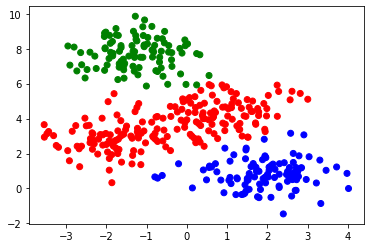

In [ ]:
colors = np.array(['r','g','b'])
plt.scatter(data3['x'],data3['y'],color=colors[data3['lable'].astype('int')])

In [ ]:
data4,c2 = k_means(4,data[['x','y']])
data4

,x,y,dist0,dist1,dist2,dist3,lable,Previous_label
0,0.874365,5.926937,2.970944,4.483009,6.306981,2.676368,3,3
1,-3.185937,2.356974,4.602873,7.740769,6.374288,4.948304,0,0
2,-3.472231,3.131644,4.846158,7.076040,6.964558,4.342136,0,0
3,0.589067,4.318645,1.535340,5.846792,4.904533,3.463166,3,3
4,-2.955939,2.162257,4.407972,7.877472,6.087480,5.064646,0,0
...,...,...,...,...,...,...,...,...
395,-0.065350,5.021496,2.482102,4.987431,5.827217,2.506967,3,3
396,0.097164,4.883143,2.275798,5.162652,5.628996,2.715430,3,3
397,0.844816,0.478342,2.574216,9.618090,1.937966,6.981806,2,2
398,0.764886,2.855046,0.623793,7.296078,3.537860,4.781739,3,3


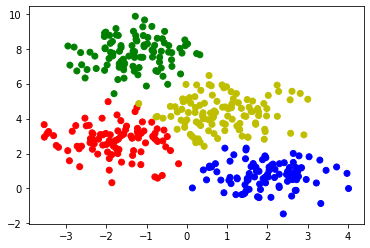

In [ ]:
colors = np.array(['r','g','b','y'])
plt.scatter(data4['x'],data4['y'],color=colors[data4['lable'].astype('int')])

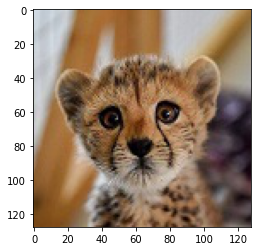

In [ ]:
#1_2
plt.imshow(img)
plt.show()

In [ ]:
w,h,c= img.shape
img = img.reshape(w*h,c)
img_df = pd.DataFrame(img,columns=list('rgb'))
img_df

,r,g,b
0,214,223,232
1,213,222,231
2,212,221,230
3,212,221,230
4,200,210,219
...,...,...,...
16379,112,103,98
16380,107,98,93
16381,103,92,90
16382,100,88,88


In [ ]:
img_lable,c3 = k_means(6,img_df)
img_lable

,r,g,b,dist0,dist1,dist2,dist3,dist4,dist5,lable,Previous_label
0,214,223,232,17.233688,20.149442,13.638182,17.521415,18.384776,20.880613,0,0
1,213,222,231,17.378147,15.905974,14.177447,13.856406,19.000000,8.660254,0,0
2,212,221,230,23.853721,19.026298,21.863211,18.411953,19.748418,22.090722,0,0
3,212,221,230,23.853721,19.026298,21.863211,18.411953,19.748418,22.090722,0,0
4,200,210,219,17.233688,21.213203,21.587033,14.730920,23.194827,19.442222,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16379,112,103,98,17.464249,16.911535,18.920888,23.727621,17.944358,9.165151,1,1
16380,107,98,93,19.131126,18.027756,14.594520,23.151674,14.730920,19.052559,1,1
16381,103,92,90,14.594520,12.727922,16.370706,19.621417,19.544820,19.339080,1,1
16382,100,88,88,18.000000,23.216374,11.874342,19.748418,16.340135,10.630146,1,1


In [ ]:
c3


[lable
 0    196.978630
 1     96.080334
 2     42.850131
 3    149.371382
 4    179.760917
 5    160.993122
 Name: r, dtype: float64, lable
 0    197.139874
 1     71.817481
 2     27.579188
 3    103.301922
 4    159.240813
 5    128.636751
 Name: g, dtype: float64, lable
 0    197.894123
 1     57.383033
 2     25.217932
 3     57.682334
 4    137.524859
 5     97.968556
 Name: b, dtype: float64]

In [ ]:
img_lable['lable'].astype('int')


0        0
1        0
2        0
3        0
4        0
        ..
16379    1
16380    1
16381    1
16382    1
16383    1
Name: lable, Length: 16384, dtype: int64

In [ ]:
for i in range(len(img_lable.index)):
  img_lable['r'][i] = c3[0][img_lable['lable'][i]]
  img_lable['g'][i] = c3[1][img_lable['lable'][i]]
  img_lable['b'][i] = c3[2][img_lable['lable'][i]]
img_lable = img_lable.astype('int')
img_lable

<ipython-input-216-a4426877f927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_lable['r'][i] = c3[0][img_lable['lable'][i]]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-216-a4426877f927>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_lable['g'][i] = c3[1][img_lable['lable'][i]]
<ipython-inpu

,r,g,b,dist0,dist1,dist2,dist3,dist4,dist5,lable,Previous_label
0,196,197,197,17,20,13,17,18,20,0,0
1,196,197,197,17,15,14,13,19,8,0,0
2,196,197,197,23,19,21,18,19,22,0,0
3,196,197,197,23,19,21,18,19,22,0,0
4,196,197,197,17,21,21,14,23,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16379,96,71,57,17,16,18,23,17,9,1,1
16380,96,71,57,19,18,14,23,14,19,1,1
16381,96,71,57,14,12,16,19,19,19,1,1
16382,96,71,57,18,23,11,19,16,10,1,1


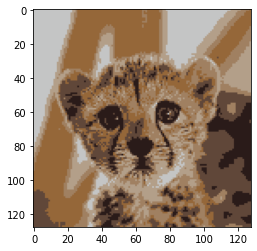

In [ ]:
final = img_lable[['r','g','b']]
final_pic = final.to_numpy()
final_pic = final_pic.reshape(w,h,c)
plt.imshow(final_pic)
plt.show()

In [ ]:
img_df2 = pd.DataFrame(img,columns=list('rgb'))
img_df2
img_sample_2,c4 = k_means(8,img_df2)
img_sample_2

,r,g,b,dist0,dist1,dist2,dist3,dist4,dist5,dist6,dist7,lable,Previous_label
0,214,223,232,20.469489,8.944272,20.928450,12.041595,17.146428,14.352700,19.313208,13.453624,7,7
1,213,222,231,14.560220,19.874607,17.233688,13.190906,21.000000,21.000000,17.378147,24.289916,7,7
2,212,221,230,16.340135,14.282857,12.727922,21.563859,18.384776,13.038405,15.394804,22.203603,7,7
3,212,221,230,16.340135,14.282857,12.727922,21.563859,18.384776,13.038405,15.394804,22.203603,7,7
4,200,210,219,17.233688,21.307276,19.748418,19.467922,17.378147,18.055470,19.313208,16.401219,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,112,103,98,22.869193,21.354157,23.021729,20.904545,20.542639,14.899664,17.117243,16.155494,4,4
16380,107,98,93,17.088007,16.583124,19.313208,24.859606,13.000000,20.223748,15.165751,23.452079,4,4
16381,103,92,90,9.643651,17.146428,14.966630,16.401219,18.384776,19.646883,15.394804,14.594520,4,4
16382,100,88,88,14.071247,18.027756,18.894444,19.849433,17.521415,19.874607,16.492423,4.000000,4,4


In [ ]:
img_sample_2['lable'].astype('int')

0        7
1        7
2        7
3        7
4        7
        ..
16379    4
16380    4
16381    4
16382    4
16383    4
Name: lable, Length: 16384, dtype: int64

In [ ]:
for i in range(len(img_sample_2.index)):
  img_sample_2 ['r'][i] = c4[0][img_sample_2 ['lable'][i]]
  img_sample_2 ['g'][i] = c4[1][img_sample_2 ['lable'][i]]
  img_sample_2 ['b'][i] = c4[2][img_sample_2 ['lable'][i]]
img_sample_2 = img_sample_2.astype('int')
img_sample_2

<ipython-input-220-47f4155dd9d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_sample_2 ['r'][i] = c4[0][img_sample_2 ['lable'][i]]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-220-47f4155dd9d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_sample_2 ['g'][i] = c4[1][img_sample_2 ['lable'][i

,r,g,b,dist0,dist1,dist2,dist3,dist4,dist5,dist6,dist7,lable,Previous_label
0,197,197,199,20,8,20,12,17,14,19,13,7,7
1,197,197,199,14,19,17,13,21,21,17,24,7,7
2,197,197,199,16,14,12,21,18,13,15,22,7,7
3,197,197,199,16,14,12,21,18,13,15,22,7,7
4,197,197,199,17,21,19,19,17,18,19,16,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,116,95,83,22,21,23,20,20,14,17,16,4,4
16380,116,95,83,17,16,19,24,13,20,15,23,4,4
16381,116,95,83,9,17,14,16,18,19,15,14,4,4
16382,116,95,83,14,18,18,19,17,19,16,4,4,4


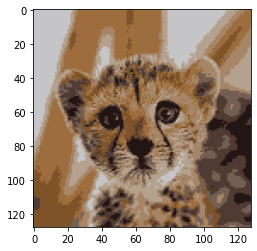

In [ ]:
final2 = img_sample_2 [['r','g','b']]
final_pic2 = final2.to_numpy()
final_pic2 = final_pic2.reshape(w,h,c)
plt.imshow(final_pic2)
plt.show()